# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [ ]:
#URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [ ]:
#import requests
#import bs4
#from bs4 import BeautifulSoup

In [ ]:
## YOUR CODE HERE

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it
    - Remember to use `try/except` if you anticipate errors
- **Test** the functions on the results above and simple examples

In [ ]:
## YOUR CODE HERE

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [ ]:
#YOUR_CITY = ''

In [ ]:
#url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
#max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
## Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
#
#results = []
#
#for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
#    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
#    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):
#    for start in range(0, max_results_per_city, 10):
#        # Grab the results from the request (as above)
#        # Append to the full set of results
#        pass

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [ ]:
## YOUR CODE HERE

### Save your results as a CSV

In [ ]:
## YOUR CODE HERE

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('../../../data/indeed-scraped-job-postings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
city             413 non-null object
company          413 non-null object
salary           413 non-null object
summary          413 non-null object
title            413 non-null object
parsed_salary    406 non-null float64
dtypes: float64(1), object(5)
memory usage: 19.4+ KB


In [4]:
df.head(2)

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5


In [5]:
df.shape

(413, 6)

In [6]:
df.city.unique()

array(['Denver', 'Austin', 'Seattle', 'Philadelphia', 'Palo+Alto',
       'Pittsburgh', 'Miami', 'Chicago', 'Dallas', 'San+Diego', 'New+York',
       'Boston', 'Los+Angeles', 'Phoenix', 'Houston', 'Portland',
       'San+Francisco', 'Atlanta'], dtype=object)

In [7]:
df.dropna(inplace=True)
df.drop(['salary'], axis=1, inplace=True)

In [8]:
mean = df.parsed_salary.mean()
mean

107762.69581280788

In [9]:
df['above_107k'] = df.parsed_salary.apply(lambda x: 1 if x > mean else 0)

In [10]:
df['above_107k'].value_counts()

0    217
1    189
Name: above_107k, dtype: int64

In [11]:
# Domain and Data

# Data from indeed was scaped and prepared for predicting skills needed
# for data scientists to leverage negotiation.

# 406 job posts from 18 US cities
# 5 feautures: city, company, salary range, job summary and title

In [12]:
# Problem Statement

# What factors most directly impact salaries of a data scientist (Title, 
# location, department, etc.)? We need a model that can predict a good salary
# depending on skills and experience with minimizing the false positive rate
# which is x-axis on the curve. To ensure clients plot the ROC curve and 
# explain the significance and any tradeoffs. 

In [13]:
# Solution Statement

# We will develp a binary classification method using KNearestNeighbors 
# classifier.

In [14]:
# Metric

# we evaluate the models based on the correct and incorrect labeling 
# of classes. We will examine all of the metrics Accuracy, Precision, Recall, and 
# AUC. In this scenerio Recall and Auc are more important.

In [15]:
base_accuracy = 1.0 - df['above_107k'].mean()
base_accuracy

0.5344827586206897

In [16]:
# Benchmark

# We will use 0.53 as our base accuracy benchmark.

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [17]:
# clean data and extract key words! I wish I had known about CountVectorizer
# before this whole mess :/

df.summary = df.summary.str.replace((',|/|\(|\)'),(' ')).str.strip().str.lower()
df.title = df.title.str.replace((',|/|\(|\)'),(' ')).str.strip().str.lower()

In [18]:
ds_tools = 'R SQL Python ML NLP C Algorithms Algorithm Algo MYSQL \
CNUP JS Java Erlang Impala Geospatial Hadoop SAS Java Hive \
Matlab Pig UNIX Linux Ruby SPSS Tableau Excel AWS \
SVP API Spark Scala awk Cassandra JavaScript Storm Cloud Agile'

In [19]:
ds_tools = ds_tools.lower().split()

In [20]:
import re
pattern = re.compile(r'\b(' + r'|'.join(ds_tools) + r')\b\s*')
df['language'] = df['summary'].str.findall(pattern)
df['language_t'] = df['title'].str.findall(pattern)

In [21]:
df.head(3)

,city,company,summary,title,parsed_salary,above_107k,language,language_t
0,Denver,Department Of The Interior,would you like to join the more than 10 000 sc...,statistician gs-1350-12 deu-perm-ds,87792.0,0,[],[]
1,Denver,Department Of The Interior,investigate potential uses of geospatial data ...,interdisciplinary cartographer geographer - gs...,85127.5,0,[geospatial],[]
2,Denver,Mental Health Center of Denver,advise the data developer with regard to creat...,financial data scientist,75000.0,0,[],[]


In [22]:
level = ['senior','sr.','junior','jr.','lead','vp','vice president', 'avp','assistant',
         'asst.','director','dir','staff','master','masters','postdoc','manager','mid-level',
         'postdoctoral','post-doctoral','deputy','associate','entry level',' 1 ',' 2 ',' 3 ',
         ' iv ',' iii ',' ii ',' i ','phd','fellow','head','supervisory','snr','chief',
         'specialist','ms','consultant','consultants']

pattern = '(%s)' % '|'.join(level)
df['levels'] = df['title'].str.findall(pattern)

In [23]:
df['levels'] = df['levels'].apply(lambda x: '-'.join(x))

In [24]:
df['levels'].unique()

array(['', 'senior', 'assistant', 'specialist', 'manager',
       'assistant-manager', 'sr.', 'postdoc', 'entry level', 'lead',
       'director', 'staff', 'master', 'ms', 'associate', 'sr.-consultant',
       'ms-phd', 'mid-level', 'senior-manager', 'vp', 'avp', ' 3 ',
       'senior-director', 'post-doctoral', ' iii ', 'deputy-director',
       'ms-manager', 'assistant- i ', 'junior', 'postdoc-fellow',
       'senior-staff-assistant', 'senior-lead', 'postdoc-associate',
       'senior-ms', 'jr.', 'manager-ms', 'asst.-director', 'chief', 'phd',
       'junior-mid-level', 'phd-ms', ' iv ', ' ii ',
       'senior-staff-director', 'specialist- i ', 'head', 'vice president',
       'supervisory', 'dir', 'snr'], dtype=object)

In [25]:
df['levels'] = np.where(df['levels'] =='sr.', 'senior', df['levels'])
df['levels'] = np.where(df['levels'] =='jr.', 'junior', df['levels'])
df['levels'] = np.where(df['levels'] =='post-doctoral','postdoc', df['levels'])
df['levels'] = np.where(df['levels'] =='entry level', 'assistant', df['levels'])
df['levels'] = np.where(df['levels'] =='avp', 'assistant', df['levels'])
df['levels'] = np.where(df['levels'] ==' 3 ', 'junior', df['levels'])
df['levels'] = np.where(df['levels'] ==' iv ', 'senior', df['levels'])
df['levels'] = np.where(df['levels'] =='assistant- i ', 'assistant', df['levels'])
df['levels'] = np.where(df['levels'] =='specialist- i ', 'assistant', df['levels'])
df['levels'] = np.where(df['levels'] ==' ii ', 'junior', df['levels'])
df['levels'] = np.where(df['levels'] ==' iii ', 'junior', df['levels'])
df['levels'] = np.where(df['levels'] =='mid-level', 'junior', df['levels'])
df['levels'] = np.where(df['levels'] =='vice president', 'vp', df['levels'])
df['levels'] = np.where(df['levels'] =='dir', 'director', df['levels'])
df['levels'] = np.where(df['levels'] =='asst.-director', 'assistant', df['levels'])
df['levels'] = np.where(df['levels'] =='snr', 'senior', df['levels'])
df['levels'] = np.where(df['levels'] =='ms', 'master', df['levels'])
df['levels'] = np.where(df['levels'] =='ms-phd', 'master-phd', df['levels'])
df['levels'] = np.where(df['levels'] =='phd-ms', 'master-phd', df['levels'])
df['levels'] = np.where(df['levels'] =='ms-manager', 'manager', df['levels'])
df['levels'] = np.where(df['levels'] =='manager-ms', 'manager', df['levels'])
df['levels'] = np.where(df['levels'] =='senior-ms', 'senior', df['levels'])
df['levels'] = np.where(df['levels'] =='sr.-consultant', 'senior', df['levels'])

In [26]:
df['senior'] = df[
    'levels'].apply(lambda x: 1 if re.findall('senior',x) else 0)
df['junior'] = df[
    'levels'].apply(lambda x: 1 if re.findall('junior',x) else 0)
df['manager'] = df[
    'levels'].apply(lambda x: 1 if re.findall('manager',x) else 0)
df['assistant'] = df[
    'levels'].apply(lambda x: 1 if re.findall('assistant',x) else 0)
df['director'] = df[
    'levels'].apply(lambda x: 1 if re.findall('director',x) else 0)
df['associate'] = df[
    'levels'].apply(lambda x: 1 if re.findall('associate',x) else 0)
df['vp'] = df[
    'levels'].apply(lambda x: 1 if re.findall('vp',x) else 0)
df['master'] = df[
    'levels'].apply(lambda x: 1 if re.findall('master',x) else 0)
df['phd'] = df[
    'levels'].apply(lambda x: 1 if re.findall('phd',x) else 0)

In [27]:
patterns = ['big.data','bi data','data scien+','analy+','statist+',
            'enginee+','deep l+','machine l+','developer','programmer',
            'op+','devop+','developm+','gs','natural language processing','nlp','full stack']

In [28]:
pattern = '(%s)' % '|'.join(patterns)
df['words'] = df['summary'].str.findall(pattern)

In [29]:
df['words_t'] = df['title'].str.findall(pattern)

In [30]:
df.head(2)

,city,company,summary,title,parsed_salary,above_107k,language,language_t,levels,senior,junior,manager,assistant,director,associate,vp,master,phd,words,words_t
0,Denver,Department Of The Interior,would you like to join the more than 10 000 sc...,statistician gs-1350-12 deu-perm-ds,87792.0,0,[],[],,0,0,0,0,0,0,0,0,0,[gs],"[statist, gs]"
1,Denver,Department Of The Interior,investigate potential uses of geospatial data ...,interdisciplinary cartographer geographer - gs...,85127.5,0,[geospatial],[],,0,0,0,0,0,0,0,0,0,[op],[gs]


In [31]:
df['words'] = df['words'] + df['words_t']
df['language'] = df['language'] + df['language_t']
df['words'] = df['language'] + df['words']

In [32]:
df['words'] = df['words'].str.join(' ')

In [33]:
df.drop(['language_t','words_t','language'],axis=1,inplace=True)

In [34]:
big_data = ['big.data','bi data']
pattern = '(%s)' % '|'.join(big_data)

df['big_data'] = df['words'].apply(lambda x: 1 if re.findall(pattern,x) else 0)
df['data_scientist'] = df['words'].apply(lambda x: 1 if re.findall('data scien+',x) else 0)
df['analyst'] = df['words'].apply(lambda x: 1 if re.findall('analy+',x) else 0)
df['statistic'] = df['words'].apply(lambda x: 1 if re.findall('statist+',x) else 0)
df['engineer'] = df['words'].apply(lambda x: 1 if re.findall('enginee+',x) else 0)
df['deep_learning'] = df['words'].apply(lambda x: 1 if re.findall('deep l+',x) else 0)
df['machine_learning'] = df[
    'words'].apply(lambda x: 1 if re.findall('machine l+',x) else 0)
df['developer'] = df[
    'words'].apply(lambda x: 1 if re.findall('developer',x) else 0)
df['programmer'] = df[
    'words'].apply(lambda x: 1 if re.findall('programmer',x) else 0)
df['operations'] = df[
    'words'].apply(lambda x: 1 if re.findall('op+',x) else 0)
df['devops'] = df[
    'words'].apply(lambda x: 1 if re.findall('devop+',x) else 0)
df['development'] = df[
    'words'].apply(lambda x: 1 if re.findall('developm+',x) else 0)
df['government'] = df[
    'words'].apply(lambda x: 1 if re.findall('gs',x) else 0)
df['nlp'] = df[
    'words'].apply(lambda x: 1 if re.findall('natural language processing|nlp',x) else 0)
df['full_stack'] = df[
    'words'].apply(lambda x: 1 if re.findall('full stack',x) else 0)
df['r'] = df[
    'words'].apply(lambda x: 1 if re.findall('r',x) else 0)
df['sql'] = df[
    'words'].apply(lambda x: 1 if re.findall('sql',x) else 0)
df['python'] = df[
    'words'].apply(lambda x: 1 if re.findall('python',x) else 0)
df['ml'] = df[
    'words'].apply(lambda x: 1 if re.findall('ml',x) else 0)
df['c++'] = df[
    'words'].apply(lambda x: 1 if re.findall('c',x) else 0)
df['algorithm'] = df[
    'words'].apply(lambda x: 1 if re.findall('algorithms|algorithm|algo',x) else 0)
df['mysql'] = df[
    'words'].apply(lambda x: 1 if re.findall('mysql',x) else 0)
df['javascript'] = df[
    'words'].apply(lambda x: 1 if re.findall('js|javascript',x) else 0)
df['erlang'] = df[
    'words'].apply(lambda x: 1 if re.findall('erlang',x) else 0)
df['impala'] = df[
    'words'].apply(lambda x: 1 if re.findall('impala',x) else 0)
df['geospatial'] = df[
    'words'].apply(lambda x: 1 if re.findall('geospatial',x) else 0)
df['hadoop'] = df[
    'words'].apply(lambda x: 1 if re.findall('hadoop',x) else 0)
df['sas'] = df[
    'words'].apply(lambda x: 1 if re.findall('sas',x) else 0)
df['java'] = df[
    'words'].apply(lambda x: 1 if re.findall('java',x) else 0)
df['hive'] = df[
    'words'].apply(lambda x: 1 if re.findall('hive',x) else 0)
df['matlab'] = df[
    'words'].apply(lambda x: 1 if re.findall('matlab',x) else 0)
df['pig'] = df[
    'words'].apply(lambda x: 1 if re.findall('pig',x) else 0)
df['spss'] = df[
    'words'].apply(lambda x: 1 if re.findall('spss',x) else 0)
df['cloud'] = df[
    'words'].apply(lambda x: 1 if re.findall('cloud',x) else 0)
df['scala'] = df[
    'words'].apply(lambda x: 1 if re.findall('scala',x) else 0)
df['unix'] = df[
    'words'].apply(lambda x: 1 if re.findall('unix',x) else 0)
df['cnup'] = df[
    'words'].apply(lambda x: 1 if re.findall('cnup',x) else 0)
df['aws'] = df[
    'words'].apply(lambda x: 1 if re.findall('aws',x) else 0)
df['spark'] = df[
    'words'].apply(lambda x: 1 if re.findall('spark',x) else 0)
df['cassandra'] = df[
    'words'].apply(lambda x: 1 if re.findall('cassandra',x) else 0)
df['svp'] = df[
    'words'].apply(lambda x: 1 if re.findall('svp',x) else 0)
df['tableau'] = df[
    'words'].apply(lambda x: 1 if re.findall('tableau',x) else 0)
df['api'] = df[
    'words'].apply(lambda x: 1 if re.findall('api',x) else 0)
df['linux'] = df[
    'words'].apply(lambda x: 1 if re.findall('linux',x) else 0)
df['excel'] = df[
    'words'].apply(lambda x: 1 if re.findall('excel',x) else 0)
df['ruby'] = df[
    'words'].apply(lambda x: 1 if re.findall('ruby',x) else 0)

In [35]:
city_df = pd.get_dummies(df['city'])

#### Thought experiment: What is the baseline accuracy for this model?

In [36]:
base_accuracy = 1.0 - df['above_107k'].mean()

In [37]:
level_df = df[['senior','junior','manager','assistant','director',
               'associate','vp','master','phd','above_107k']]
level_corr = level_df.corr()

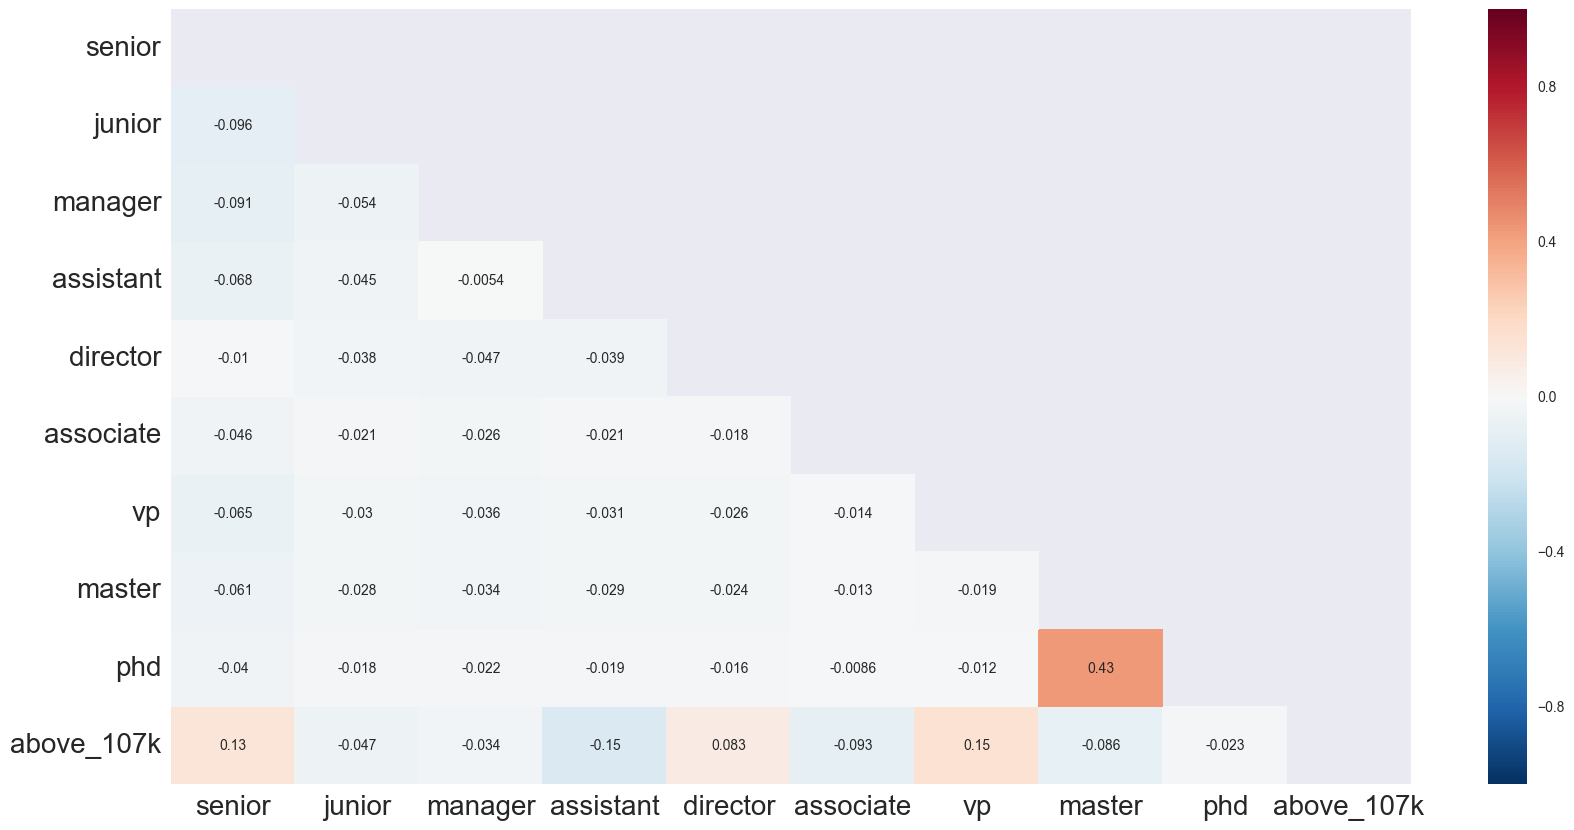

In [38]:
fig = plt.figure(figsize=(20,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(level_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(level_corr, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20, 
                   rotation='horizontal')

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [39]:
df.groupby(['city','company'])['parsed_salary'].max()

city           company                                    
Atlanta        Amana Academy Charter School                    34999.5
               CSTE                                            54182.0
               Centers for Disease Control and Prevention     141158.0
               Emory University                                56200.0
               Ga. Dept. of Admin. Services                    41000.0
               JVI                                             55000.0
               Principle Solutions Group                       80000.0
               Selby Jennings                                 212500.0
               Smith Hanley Associates                         87500.0
               Synergy Search Group                            80000.0
               Velossent                                      160000.0
               Wismettac Asian Foods, Inc.                     50794.0
               firstPRO                                       120000.0
Austin         All

In [40]:
df.pivot_table(values=['company','parsed_salary'],index=['city'],aggfunc='max')

,company,parsed_salary
city,,
Atlanta,firstPRO,212500.0
Austin,TechTank Staffing & Consulting Solutions,160000.0
Boston,"Zachary Piper, LLC",240000.0
Chicago,Workbridge Associates,200000.0
Dallas,Workbridge Associates,165000.0
Denver,University of Colorado,170000.0
Houston,Texas A&M University,93431.0
Los+Angeles,Selby Jennings,200000.0
Miami,University of Miami,107500.0


In [41]:
df.describe()

,parsed_salary,above_107k,senior,junior,manager,assistant,director,associate,vp,master,...,cnup,aws,spark,cassandra,svp,tableau,api,linux,excel,ruby
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.00000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,107762.695813,0.465517,0.174877,0.041872,0.061576,0.044335,0.03202,0.009852,0.019704,0.017241,...,0.002463,0.007389,0.017241,0.002463,0.002463,0.004926,0.002463,0.009852,0.009852,0.002463
std,48931.367632,0.499425,0.380330,0.200544,0.240681,0.206092,0.17627,0.098890,0.139154,0.130330,...,0.049629,0.085748,0.130330,0.049629,0.049629,0.070100,0.049629,0.098890,0.098890,0.049629
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,142164.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


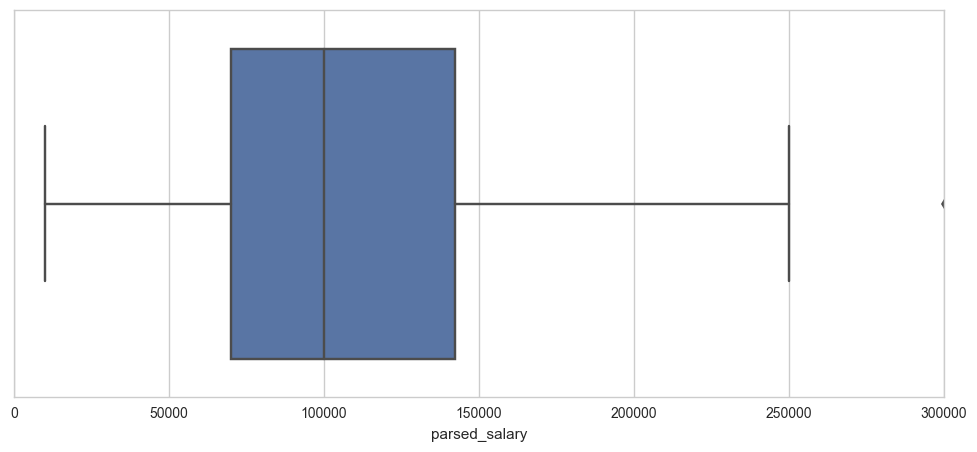

In [42]:
fig = plt.figure(figsize=(12,5))

sns.set_style("whitegrid")
ax = sns.boxplot(x=df["parsed_salary"])
plt.show()

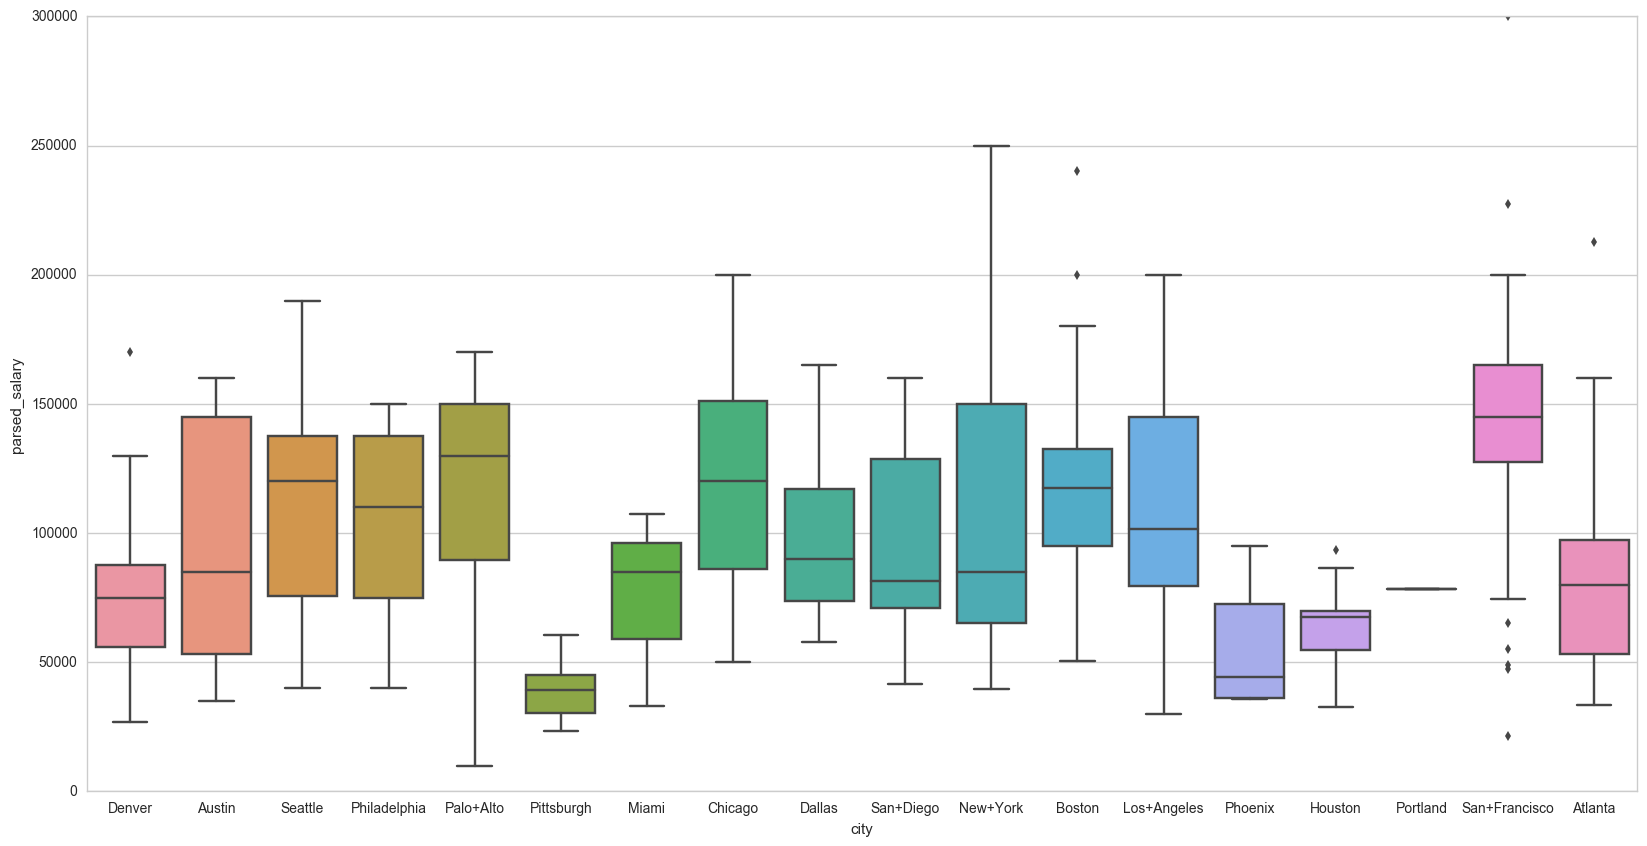

In [43]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(x="city", y="parsed_salary", data=df)


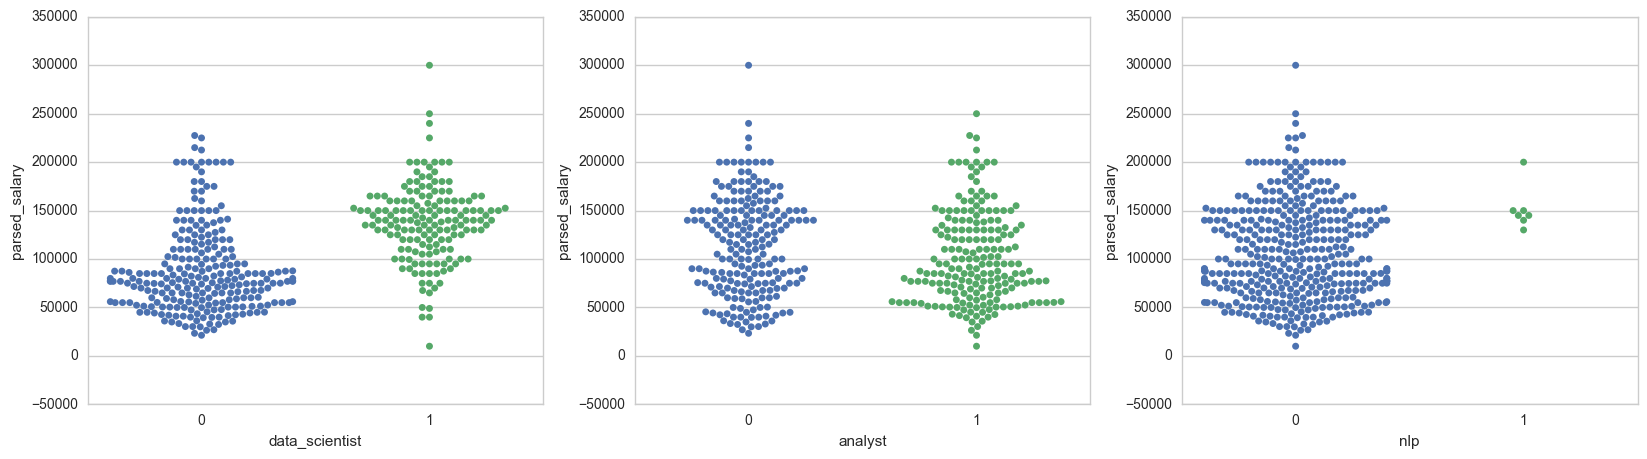

In [44]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
sns.swarmplot(x='data_scientist', 
              y='parsed_salary',
              data=df)
                            
fig.add_subplot(132)
sns.swarmplot(x='analyst', 
              y='parsed_salary',
              data=df)
                            
fig.add_subplot(133)
sns.swarmplot(x='nlp', 
              y='parsed_salary',
              data=df)                          

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [45]:
y = df['above_107k']
X = city_df

In [46]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result=logit_model.fit()
print result.summary()

         Current function value: 0.580944
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             above_107k   No. Observations:                  406
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                           17
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                  0.1590
Time:                        08:10:20   Log-Likelihood:                -235.86
converged:                      False   LL-Null:                       -280.45
                                        LLR p-value:                 8.617e-12
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Atlanta          -1.3218      0.563     -2.349      0.019        -2.425    -0.219
Austin           -0.2877      0.764     -0.377      0.70

/Users/Leyla/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
# with a p-value of 8.617e-12 we're confident that there is a corrolation between the 
# probability of getting a higher salary offer and city; specially Palo Alto with a 0.86 and 
# San Francisco at 1.3

# Odds Ratio
print np.exp(result.params)

Atlanta          2.666667e-01
Austin           7.500000e-01
Boston           1.473684e+00
Chicago          1.266667e+00
Dallas           5.000000e-01
Denver           1.333333e-01
Houston          8.426937e-07
Los+Angeles      9.166667e-01
Miami            2.402700e-11
New+York         6.721311e-01
Palo+Alto        2.375000e+00
Philadelphia     1.750000e+00
Phoenix          2.402700e-11
Pittsburgh       8.426937e-07
Portland         4.814026e-09
San+Diego        6.666667e-01
San+Francisco    3.700000e+00
Seattle          1.111111e+00
dtype: float64


In [48]:
# the odds of getting a salary of 107k+ increases 3.7 times in San Francisco

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


y = df['above_107k']
X = df[['senior','junior','manager','assistant','director','associate','vp','master','phd']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression()

scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

predict = lr.predict_proba(X_test)
print('train_score:', train_score, 'test_score:', test_score)

('train_score:', 0.63486842105263153, 'test_score:', 0.51960784313725494)


In [51]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = lr.predict(X_test)
target_names = ['senior','junior','manager','assistant','director','associate',
                'vp','master','phd']

print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     senior       0.51      0.78      0.61        50
     junior       0.56      0.27      0.36        52

avg / total       0.53      0.52      0.49       102



In [52]:
key_words = ['big_data','data_scientist','analyst','statistic','engineer','deep_learning',
              'machine_learning','developer','programmer','operations','devops','development',
              'government','nlp','full_stack','r','sql','python','ml','c++','algorithm','mysql',
              'javascript','erlang','impala','geospatial','hadoop','sas','java','hive','matlab',
              'pig','spss','cloud','scala','unix','cnup','aws','spark','cassandra','svp',
              'tableau','api','linux','excel','ruby']

In [53]:
# Let's try the key words
y = df['above_107k']
X = df[key_words]

In [54]:
from sklearn.feature_selection import RFE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()

scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rfe = RFE(model,5)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False  True False False False False False
 False  True False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False False False False False]
[23  1 36 37 35 14  1 16 18 34 19 10 31  1 29 17  6 11  3 22 13 41  1 38  8
 12 15 27 24 28  2 33  1  4  9 25 21  5 30 39 20  7 40 32 26 42]


In [55]:
# top 5 strong features

for i,j in zip(X.columns, rfe.ranking_):
    if j < 6:
        print (i,j)

('data_scientist', 1)
('machine_learning', 1)
('nlp', 1)
('ml', 3)
('javascript', 1)
('matlab', 2)
('spss', 1)
('cloud', 4)
('aws', 5)


In [56]:
predict = rfe.predict_proba(X)
print('train_score:', train_score, 'test_score:', test_score)

('train_score:', 0.63486842105263153, 'test_score:', 0.51960784313725494)


In [57]:
y_true = y_test
y_pred = rfe.predict(X_test)
target_names = key_words

print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

        big_data       0.73      0.86      0.79        50
  data_scientist       0.84      0.69      0.76        52

     avg / total       0.78      0.77      0.77       102



#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [58]:
# Let's try the key words
y = df['above_107k']
X = df[key_words]

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()

scores = cross_val_score(knn, X, y, cv=10)
print scores
print np.mean(scores)

[ 0.82926829  0.7804878   0.70731707  0.65853659  0.75609756  0.73170732
  0.65853659  0.575       0.95        0.84615385]
0.749310506567


In [60]:
knn.fit(X, y)
predicted = knn.predict(X)
predicted_probs = knn.predict_proba(X)

In [61]:
from sklearn.metrics import confusion_matrix 

contingency_table = pd.DataFrame(confusion_matrix(y, predicted),
                                 columns=['Predicted 0', 'Predicted 1'],
                                 index=['Actual 0', 'Actual 1'])

In [62]:
contingency_table

,Predicted 0,Predicted 1
Actual 0,186,31
Actual 1,48,141


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted)
# Accuracy: proportion of high salary correctly predicted by 
# the model

0.80541871921182262

In [64]:
from sklearn.metrics import precision_score
# Percision: the ability of the classifier to avoid mislabeling 
# when the observation belongs in another class

precision_score(y, predicted)

0.81976744186046513

In [65]:
from sklearn.metrics import recall_score
# Recall: the ability of the classifier to correctly identify 
# all observations in the current class

recall_score(y, predicted)

0.74603174603174605

In [66]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y, predicted)
auc(fpr, tpr)

0.80158730158730163

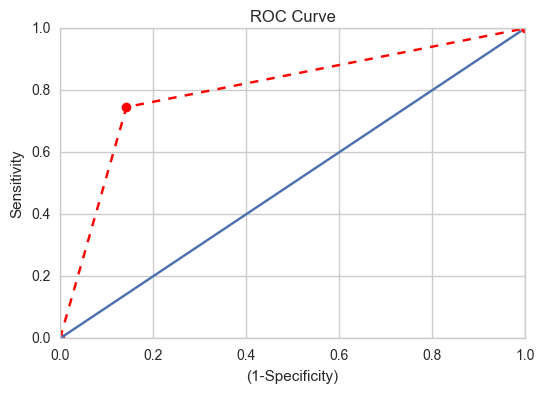

In [67]:
Sensitivity = tpr
FPR = fpr
plt.plot(FPR, Sensitivity, marker = 'o',linestyle = '--',color = 'r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

In [68]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV

In [88]:
# Let's try the key words
y = df['above_107k']
X = df[key_words]

In [89]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors':range(1,20,2),
    'weights':['uniform','distance']
}

gs = GridSearchCV(knn, knn_params, cv=10, verbose=1)
gs.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [90]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [91]:
gs.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [92]:
gs.best_score_

0.77093596059113301

In [93]:
fpr, tpr, thresholds = roc_curve(y, predicted)
auc(fpr, tpr)

0.80158730158730163

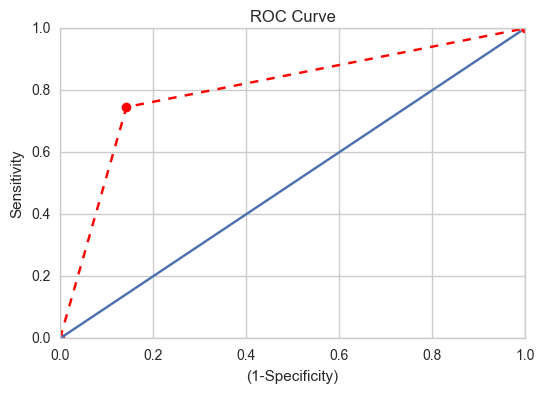

In [94]:
Sensitivity = tpr
Specificity = fpr
plt.plot(Specificity, Sensitivity, marker = 'o',linestyle = '--',color = 'r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

In [ ]:
# conclusion

# we got our model accuracy to increase to 0.82. AUC - area under curve to
# 0.80. In this scenario we want our model to be sensetive to weed out the
# type II errors and the tradeoff is specificity. Our client doesn't really
# care about compensating the deserving skilled data scientists as much as
# overpaying when the compensation was wrongfully labled as a high salary.

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [74]:
# Let's use all features

y = df['above_107k']
X = df.drop(['city','company','summary','title','parsed_salary','above_107k','levels','words'],axis=1)

In [75]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors':range(1,20,2),
    'weights':['uniform','distance']
}

gs = GridSearchCV(knn, knn_params, cv=10, verbose=1)
gs.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [76]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [77]:
gs.best_params_

{'n_neighbors': 19, 'weights': 'uniform'}

In [78]:
gs.best_score_

0.77832512315270941

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [179]:
lr = LogisticRegression()

params = {
    'penalty':['l1','l2'],  
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 10, 1000)
}

gs = GridSearchCV(lr, params, cv=10, verbose=1)
gs.fit(X, y)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   1.01099e-02, ...,   9.98999e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [180]:
print gs.best_score_
print gs.best_params_

0.775862068966
{'penalty': 'l1', 'C': 1.2913783783783785, 'solver': 'liblinear'}


In [135]:
coefs_vars = pd.DataFrame({
        'coef':gs.best_estimator_.coef_[0],
        'variable':X.columns,
        'abscoef':np.abs(gs.best_estimator_.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars[coefs_vars.coef != 0].head(6)

,abscoef,coef,variable
1,1.161518,1.161518,data_scientist
19,0.952891,0.952891,c++
33,0.691861,-0.691861,cloud
6,0.482638,0.482638,machine_learning
32,0.458665,-0.458665,spss
13,0.405314,0.405314,nlp


#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
cv_fit=cv.fit_transform(df['summary'])

print cv.vocabulary_
#print(cv.get_feature_names())
#print(cv_fit.toarray())

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [ ]:
## YOUR CODE HERE